In [33]:
import mglearn

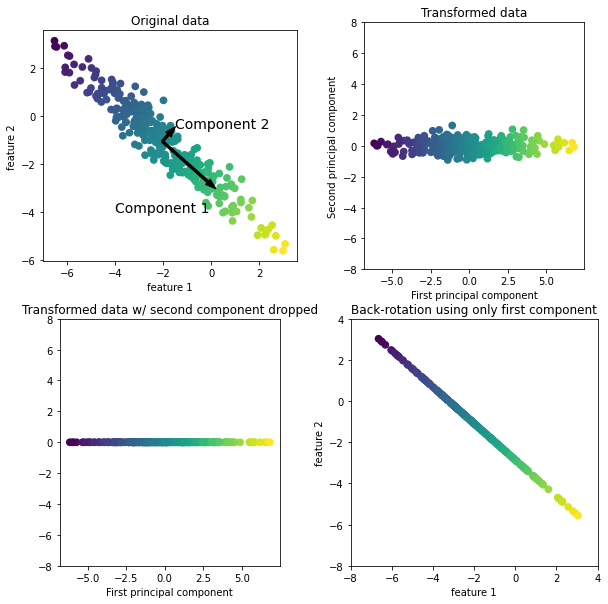

In [34]:
mglearn.plots.plot_pca_illustration()

In [14]:
from sklearn.datasets import load_breast_cancer
import numpy as np
from matplotlib import pyplot as plt

In [2]:
cancer = load_breast_cancer()

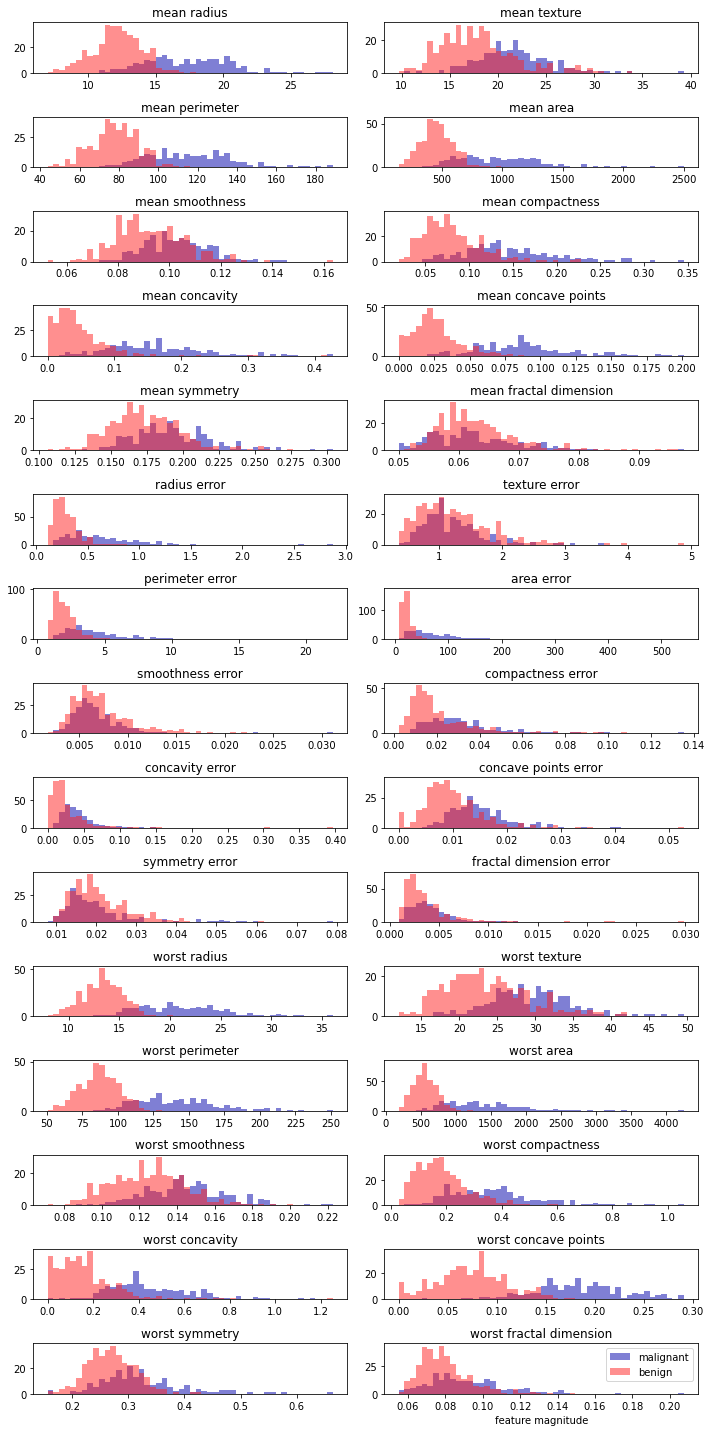

In [41]:
fig, axes = plt.subplots(15, 2, figsize=(10,20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target==1]

for i, ax in enumerate(axes.flat):
    _,bins = np.histogram(cancer.data[:, i], bins=50)
    ax.hist(malignant[:, i], bins=bins, color= mglearn.cm3(0), alpha=0.5)
    ax.hist(benign[:, i], bins=bins, color=mglearn.cm3(1), alpha=0.5)
    ax.set_title(cancer.feature_names[i])
ax.set(xlabel='feature magnitude', ylabel='')
ax.legend(['malignant', 'benign'],loc='best')
fig.tight_layout()

In [42]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()

In [47]:
scaled_cancer = scaler.fit_transform(cancer.data)

In [49]:
from sklearn.decomposition import PCA

In [50]:
pca = PCA(n_components=2)

In [52]:
fitpca = pca.fit_transform(scaled_cancer)

In [55]:
print(f'original shape: {scaled_cancer.shape}')
print(f'shape after decomposition: {fitpca.shape}')

original shape: (569, 30)
shape after decomposition: (569, 2)


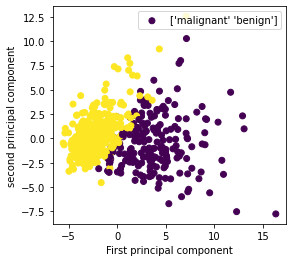

In [97]:
plt.scatter(fitpca[:, 0], fitpca[:,1], c=cancer.target, label=cancer.target_names)
plt.legend(loc='best')
ax = plt.gca()
ax.set(xlabel='First principal component', ylabel='second principal component', aspect='equal');

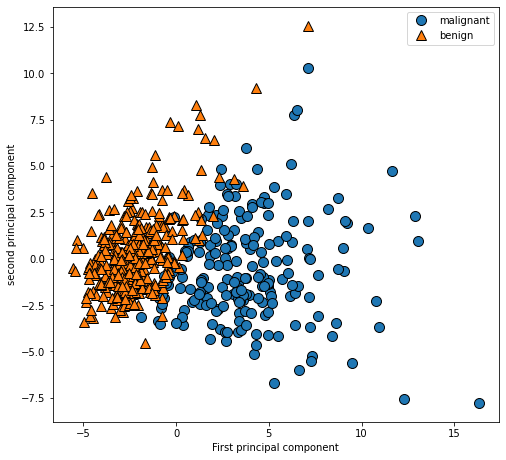

In [106]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(fitpca[:, 0], fitpca[:,1], cancer.target)
ax = plt.gca()
ax.set_aspect('equal')
ax.set(xlabel='First principal component', ylabel='second principal component')
ax.legend(cancer.target_names, loc='best');

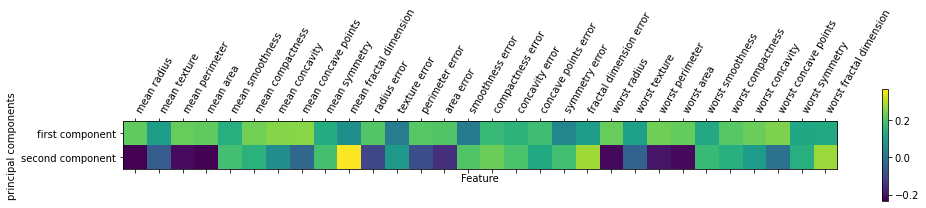

In [124]:
plt.matshow(pca.components_, cmap='viridis')
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left');
plt.xlabel('Feature')
plt.ylabel('principal components')
plt.yticks(range(2), ['first component', 'second component']);

In [125]:
from sklearn.datasets import fetch_lfw_people

In [258]:
ppl = fetch_lfw_people(min_faces_per_person=20)

In [314]:
def plot_faces(data):
    fig, axes = plt.subplots(4, 5, figsize=(8,8), subplot_kw=dict(xticks=[],yticks=[]), gridspec_kw=dict(hspace=0.2, wspace=0.05))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i], cmap='binary_r')
        ax.set_title(ppl.target_names[i], size=7)

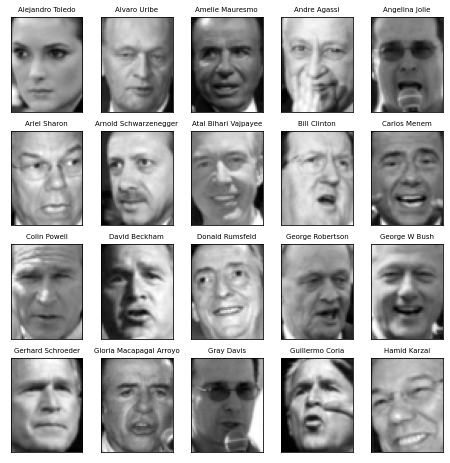

In [315]:
plot_faces(ppl.images)

In [261]:
print(f'ppl images shape: {ppl.images.shape}')
print(f'number of classes: {len(ppl.target_names)}')

ppl images shape: (3023, 62, 47)
number of classes: 62


In [262]:
counts=np.bincount(ppl.target)

In [263]:
for i, (count, name) in enumerate(zip(counts, ppl.target_names[:100])):
    print("{0:25} {1:3}".format(name, count), end='         ')
    if (i +1)%3==0:
        print()

Alejandro Toledo           39         Alvaro Uribe               35         Amelie Mauresmo            21         
Andre Agassi               36         Angelina Jolie             20         Ariel Sharon               77         
Arnold Schwarzenegger      42         Atal Bihari Vajpayee       24         Bill Clinton               29         
Carlos Menem               21         Colin Powell              236         David Beckham              31         
Donald Rumsfeld           121         George Robertson           22         George W Bush             530         
Gerhard Schroeder         109         Gloria Macapagal Arroyo    44         Gray Davis                 26         
Guillermo Coria            30         Hamid Karzai               22         Hans Blix                  39         
Hugo Chavez                71         Igor Ivanov                20         Jack Straw                 28         
Jacques Chirac             52         Jean Chretien              55         Jenn

In [353]:
mask = np.zeros(ppl.target.shape, dtype=np.bool_)

In [354]:
ppl.target

array([61, 25,  9, ..., 14, 15, 14])

In [355]:
np.where(ppl.target==25)[0]

array([   1,   13,   49,  157,  230,  245,  256,  278,  336,  354,  385,
        594,  628,  643,  674,  782,  799,  805,  865,  879,  936,  943,
        948,  959, 1013, 1174, 1188, 1240, 1266, 1372, 1388, 1428, 1464,
       1474, 1565, 1603, 1604, 1617, 1672, 1702, 1770, 1836, 2112, 2181,
       2200, 2229, 2260, 2575, 2672, 2781, 2806, 2814, 2841, 2874, 2902])

In [268]:
for target in np.unique(ppl.target):
    mask[np.where(ppl.target==target)[0][:50]]=1

In [269]:
Xppl = ppl.data[mask]
yppl = ppl.target[mask]

In [270]:
Xppl = Xppl/255 ##does not change the shape, only the values for the pixel

In [271]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [272]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xppl, yppl, stratify=yppl)

In [275]:
knn = KNeighborsClassifier(n_neighbors=1)

In [277]:
print(f'Test set score of 1-nn: {knn.fit(Xtrain, ytrain).score(Xtest, ytest)}')

Test set score of 1-nn: 0.24612403100775193


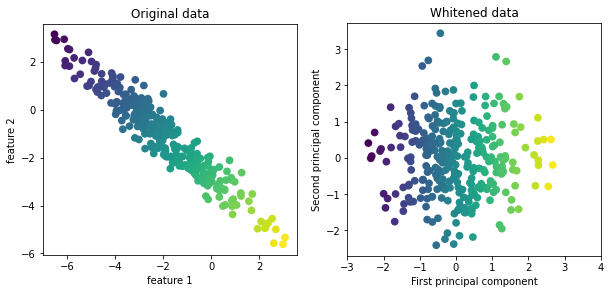

In [281]:
mglearn.plots.plot_pca_whitening()

In [302]:
pca1 =PCA(n_components=296, whiten=True)

In [303]:
TransXtrain = pca1.fit_transform(Xtrain)

In [304]:
TransXtest = pca1.transform(Xtest)

In [305]:
print(f'data shape after decomposition: {TransXtrain.shape}')

data shape after decomposition: (1547, 296)


In [306]:
knnfit = knn.fit(TransXtrain, ytrain)

In [307]:
print(f'test set accuracy: {knnfit.score(TransXtest, ytest)}') ## kinda better

test set accuracy: 0.21124031007751937


# define a function that decide the optimal components to use

In [308]:
Xtrain.shape

(1547, 2914)

In [309]:
pca2 = PCA(n_components=1547)

In [310]:
fitpca2 = pca2.fit_transform(Xtrain)

In [311]:
def optimal_component(fitmodel, goal):
    variance_ratio = fitmodel.explained_variance_ratio_
    total_variance=0
    n_component = 0 
    i = 0
    while total_variance < goal:
        total_variance += variance_ratio[i]
        n_component += 1
        i += 1
    return n_component

In [312]:
optimal_component(pca2, 0.98)

296

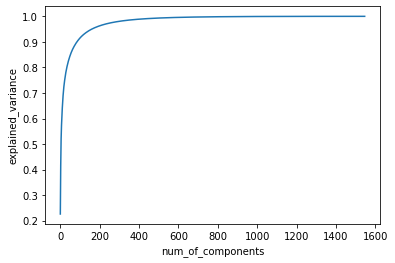

In [356]:
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('num_of_components')
plt.ylabel('explained_variance');

# plot the components

In [318]:
ppl.images.shape

(3023, 62, 47)

In [327]:
pca1.components_.shape

(296, 2914)

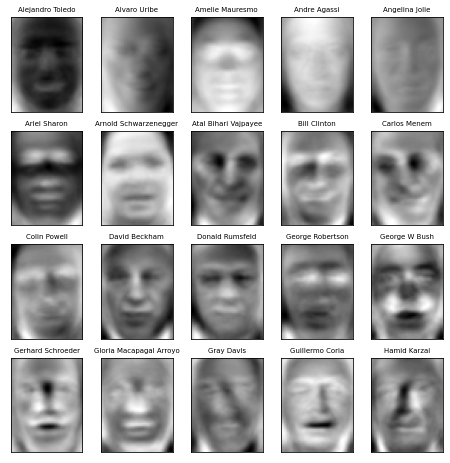

In [328]:
plot_faces(pca1.components_.reshape(296, 62,47))

# rotate back the reduced data to its original space

In [332]:
ivs = pca1.inverse_transform(TransXtrain)
ivs.shape

(1547, 2914)

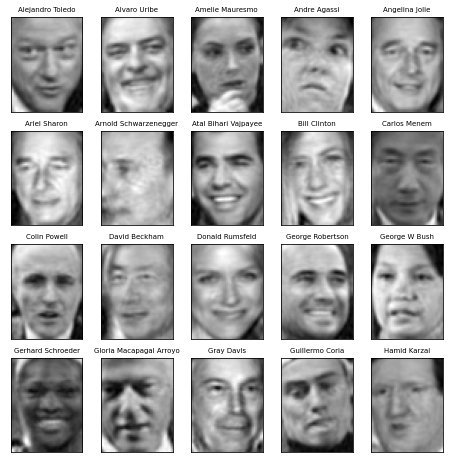

In [339]:
plot_faces(ivs.reshape(1547, 62, 47))

In [343]:
Xtrain.shape

(1547, 2914)

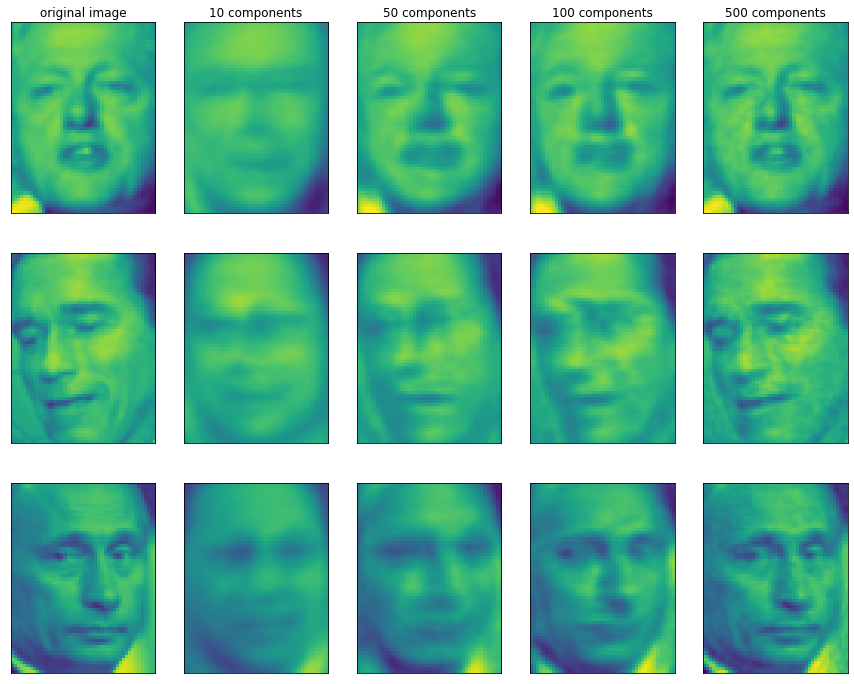

In [346]:
mglearn.plots.plot_pca_faces(Xtrain, Xtest, (62, 47))

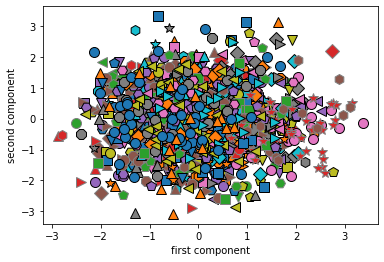

In [352]:
mglearn.discrete_scatter(TransXtrain[:,0], TransXtrain[:,1], ytrain);
plt.xlabel('first component')
plt.ylabel('second component');

In [403]:
ind =np.argsort(TransXtrain[:,1])[::-1]

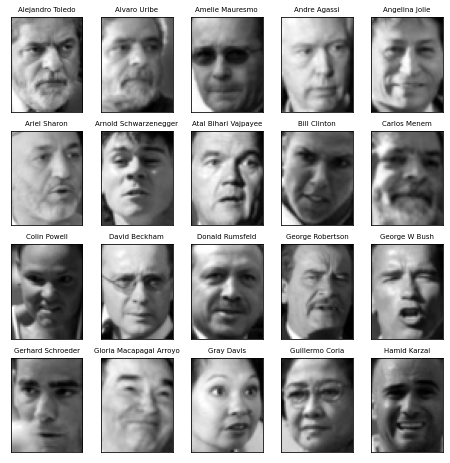

In [404]:
plot_faces(Xtrain[ind].reshape(1547, 62, 47))

# Not-Negative Matrix Factorization

/Users/david/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/Users/david/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
/Users/david/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/Users/david/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:10

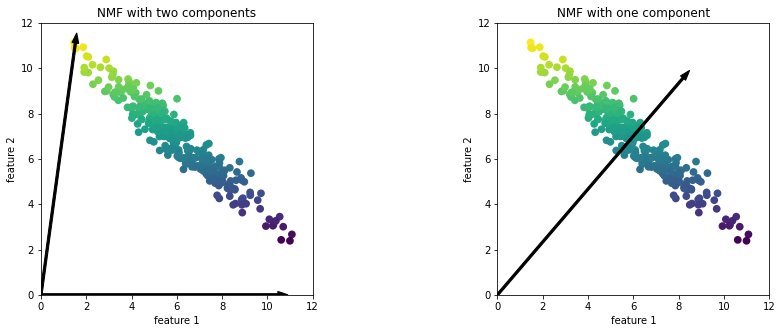

In [362]:
mglearn.plots.plot_nmf_illustration();

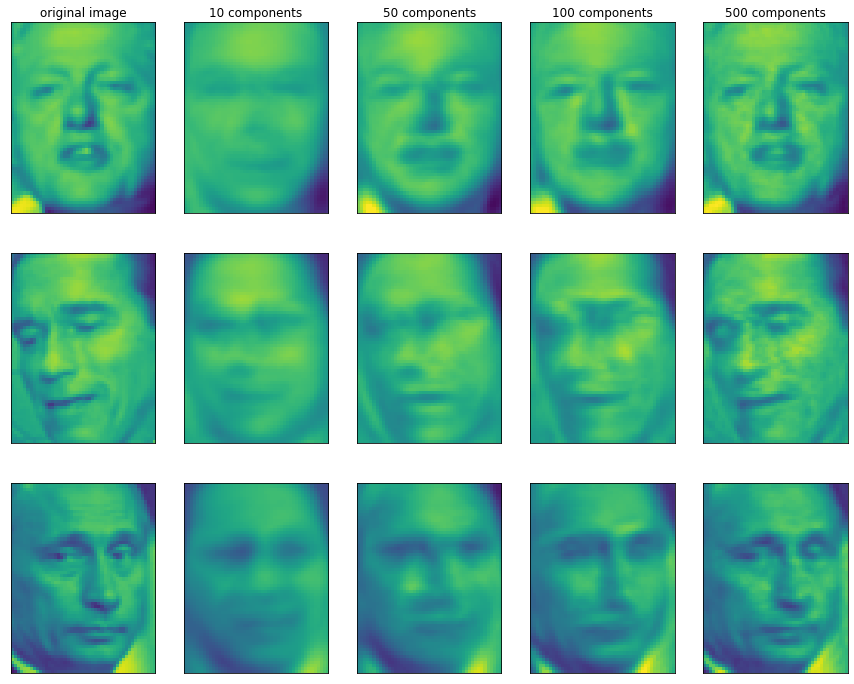

In [366]:
mglearn.plots.plot_nmf_faces(Xtrain, Xtest, (62, 47))

In [371]:
from sklearn.decomposition import NMF

In [383]:
nmf = NMF(n_components=20)

In [384]:
trainnmf = nmf.fit_transform(Xtrain)
testnmf =nmf.transform(Xtest)

/Users/david/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/Users/david/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [385]:
nmf.components_.shape

(20, 2914)

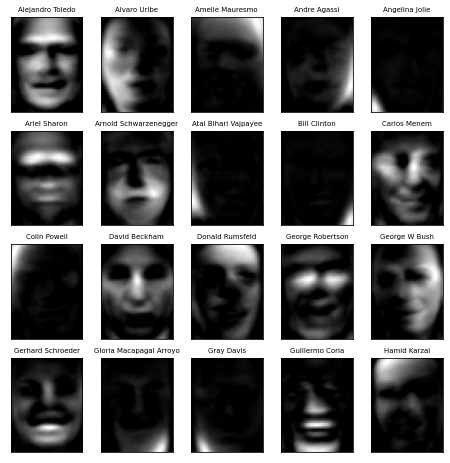

In [387]:
plot_faces(nmf.components_.reshape(20, 62,47))

In [389]:
ivsnmf = nmf.inverse_transform(trainnmf)

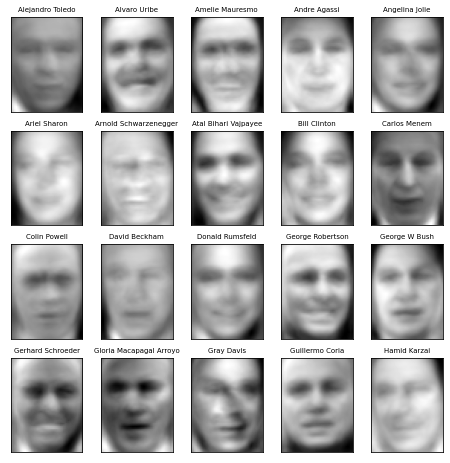

In [390]:
plot_faces(ivsnmf.reshape(1547, 62, 47))

In [396]:
trainnmf.shape

(1547, 20)

In [399]:
nmf.components_.shape

(20, 2914)

In [392]:
inds = np.argsort(trainnmf[:, 3])[::-1] ##the components produced by NMF have no natural ordering

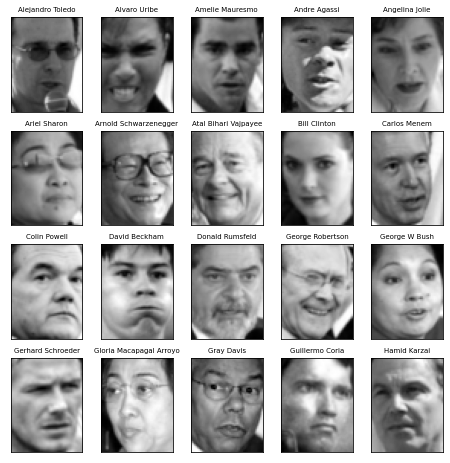

In [393]:
plot_faces(Xtrain[inds].reshape(1547, 62, 47))

In [394]:
inds2 = np.argsort(trainnmf[:, 7])[::-1]

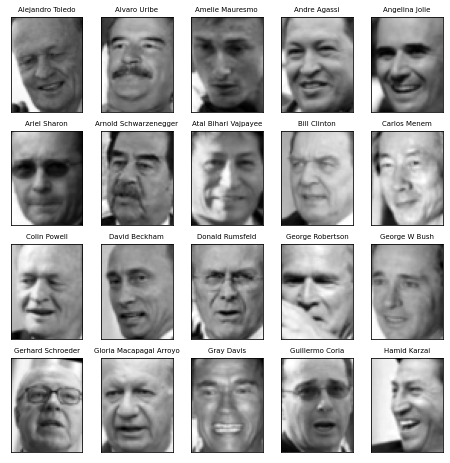

In [395]:
plot_faces(Xtrain[inds2].reshape(1547, 62, 47))

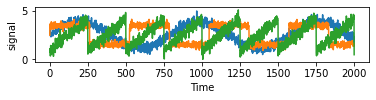

In [402]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(S,'-')
plt.xlabel('Time')
plt.ylabel('signal');

# Manifold Learning with t-SNE

In [406]:
from sklearn.datasets import load_digits

In [407]:
digits = load_digits()

In [426]:
def plot_digit(data):
    fig, axes = plt.subplots(4,5, figsize=(8,8), subplot_kw=dict(xticks=[], yticks=[]), gridspec_kw=dict(hspace=0.05, wspace=0.05))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i], cmap='binary')
        for j in ax.spines.values():
            j.set_visible(False)

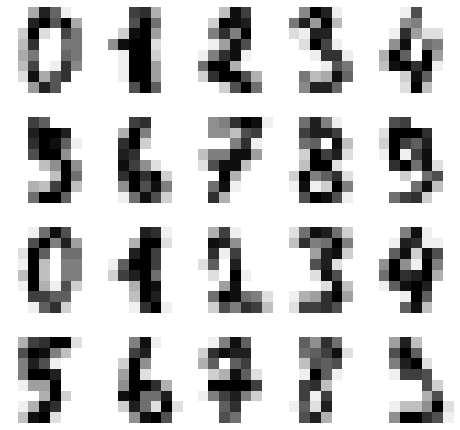

In [427]:
plot_digit(digits.images)

In [428]:
pca3 = PCA(n_components=2)

In [429]:
tpca3 = pca3.fit_transform(digits.data)

In [430]:
tpca3.shape

(1797, 2)

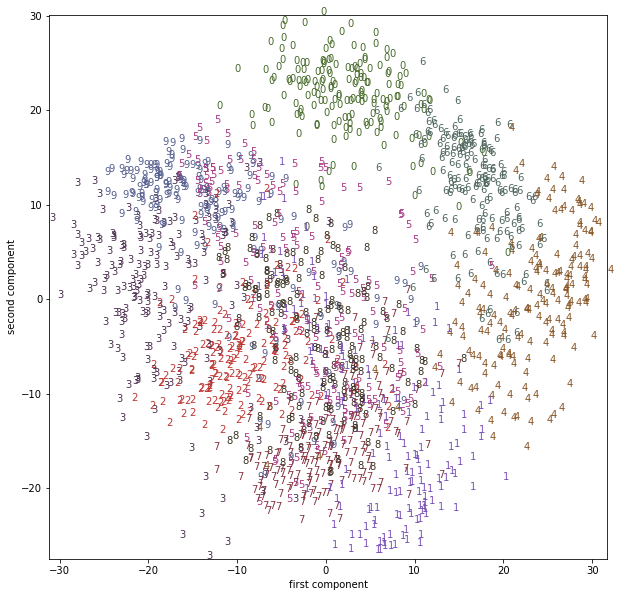

In [439]:
plt.figure(figsize=(10,10))
plt.xlim(tpca3[:, 0].min(), tpca3[:, 0].max())
plt.ylim(tpca3[:, 1].min(), tpca3[:, 1].max())
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525","#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
for i in range(len(digits.target)):
    plt.text(tpca3[i, 0], tpca3[i, 1], str(digits.target[i]), color=colors[digits.target[i]])
plt.xlabel('first component')
plt.ylabel('second component');

In [440]:
from sklearn.manifold import TSNE

In [441]:
tsne = TSNE()

In [443]:
# use fit_transform instead of fit, as TSNE has no transform method
fitsne = tsne.fit_transform(digits.data)

In [444]:
fitsne.shape

(1797, 2)

In [451]:
digits.target.shape

(1797,)

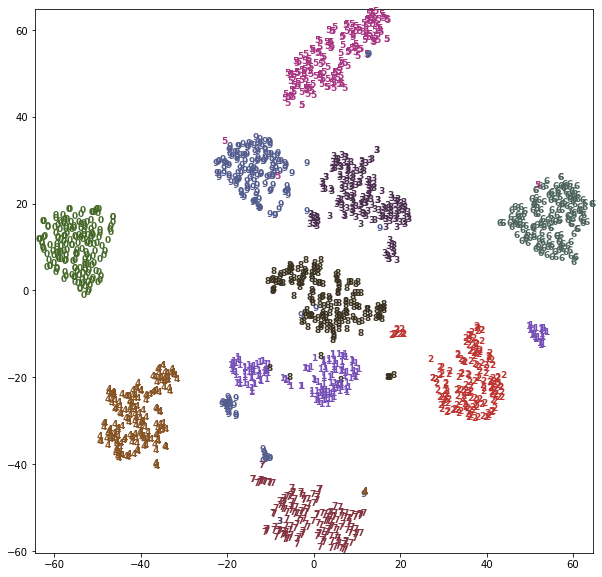

In [450]:
plt.figure(figsize=(10,10))
plt.xlim(fitsne[:, 0].min(), fitsne[:, 0].max()+1)
plt.ylim(fitsne[:, 1].min(), fitsne[:, 1].max()+1)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525","#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
for i in range(len(digits.target)):
    plt.text(fitsne[i,0], fitsne[i,1], str(digits.target[i]), color=colors[digits.target[i]], fontdict={'weight':'bold', 'size':9})

In [ ]:
## You can try playing with perplexity and early_exaggeration, but the effects are usually minor.